# In that note book we find a bset model(high accuracy) for our data set.
# Let's find out

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
x=df.drop("Outcome",axis=1)
y=df["Outcome"]


In [6]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [9]:
models={"LogisticRegression":LogisticRegression(),"Knn":KNeighborsClassifier(),
              "RandomForestClassifier":RandomForestClassifier()}


In [10]:
def fit_and_score(models,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        
        model_scores[name]=model.score(x_test,y_test)
    return model_scores    

In [11]:
models_score=fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
models_score

/home/subhadip/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.7467532467532467,
 'Knn': 0.6623376623376623,
 'RandomForestClassifier': 0.7207792207792207}

In [12]:
neighbors=np.arange(1,21)
train_scores=[]
test_scores=[]
for i in neighbors:
    knn=KNeighborsClassifier()
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

In [13]:
train_scores

[1.0,
 0.8322475570032574,
 0.8550488599348535,
 0.8094462540716613,
 0.7980456026058632,
 0.7882736156351792,
 0.7931596091205212,
 0.7768729641693811,
 0.7931596091205212,
 0.7899022801302932,
 0.7866449511400652,
 0.7833876221498371,
 0.7899022801302932,
 0.7899022801302932,
 0.7850162866449512,
 0.7850162866449512,
 0.7833876221498371,
 0.7703583061889251,
 0.7752442996742671,
 0.7719869706840391]

In [14]:
test_scores

[0.6753246753246753,
 0.7012987012987013,
 0.6493506493506493,
 0.7077922077922078,
 0.6623376623376623,
 0.7272727272727273,
 0.6883116883116883,
 0.7467532467532467,
 0.7207792207792207,
 0.7662337662337663,
 0.7337662337662337,
 0.7792207792207793,
 0.7727272727272727,
 0.7727272727272727,
 0.7597402597402597,
 0.7792207792207793,
 0.7727272727272727,
 0.7597402597402597,
 0.7532467532467533,
 0.7272727272727273]

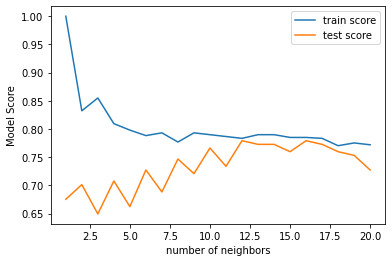

In [15]:
plt.plot(neighbors,train_scores,label="train score")
plt.plot(neighbors,test_scores,label="test score")              
plt.legend()
plt.xlabel("number of neighbors")
plt.ylabel('Model Score');

In [16]:
max(test_scores)

0.7792207792207793

In [17]:
test_scores.index(0.7792207792207793)

11

In [18]:
# Let's try to find the max score by chnaginging n_neighbors parameter 
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.7792207792207793

# Till now we have a max score of 77.9% 

In [19]:
log_reg_grid={"C":np.logspace(-4,4,20),"solver":["liblinear"]}
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                             cv=5,n_iter=20,verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [20]:
rs_log_reg.score(x_test,y_test)

0.7597402597402597

In [21]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [22]:
log_reg_grid={"C":np.logspace(-4,4,30),"solver":["liblinear"]}
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,
                       cv=5,verbose=True)
gs_log_reg.fit(x_train,y_train)
gs_log_reg.score(x_test,y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


0.7532467532467533

In [23]:
gs_log_reg.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [24]:

log_reg=LogisticRegression(C=4.281332398719396,solver='liblinear')
log_reg.fit(x_train,y_train)
log_reg.score(x_test,y_test)

0.7597402597402597

/home/subhadip/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


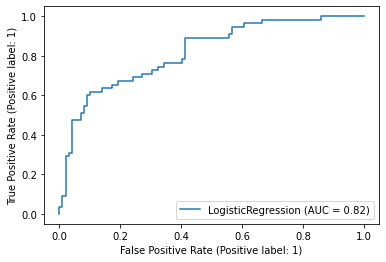

In [25]:
plot_roc_curve(log_reg,x_test,y_test)

In [26]:
y_preds=log_reg.predict(x_test)

In [27]:
print(confusion_matrix(y_test,y_preds))

[[80 19]
 [18 37]]


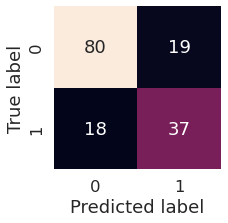

In [28]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [29]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [30]:
cv_acc=cross_val_score(log_reg,x,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.7682879212290977

In [31]:
cv_precision=cross_val_score(log_reg,x,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.7169979783018878

In [32]:
cv_recall=cross_val_score(log_reg,x,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.5598183088749126

In [33]:
cv_f1=cross_val_score(log_reg,x,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.6266847398697644

In [34]:
# Let change some parameter of RandomForestClassifer 
rf_grid={"n_estimators":np.arange(10,100,50),"max_depth":[None,3,5,10],
        "min_samples_split":np.arange(2,20,2),
        "min_samples_leaf":np.arange(1,20,2)}

In [35]:
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,
                        cv=5,n_iter=20,verbose=True)
rs_rf.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [36]:
rs_rf.score(x_test,y_test)

0.7857142857142857

In [37]:
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 6,
 'min_samples_leaf': 13,
 'max_depth': 3}

In [38]:
rfc=RandomForestClassifier(n_estimators=10,min_samples_split=6
                          ,min_samples_leaf=13,max_depth=3)
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)

0.7857142857142857

/home/subhadip/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


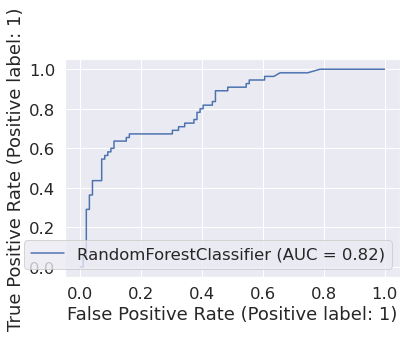

In [39]:
plot_roc_curve(rfc,x_test,y_test)

In [40]:
y_preds=log_reg.predict(x_test)

In [41]:
print(confusion_matrix(y_test,y_preds))

[[80 19]
 [18 37]]


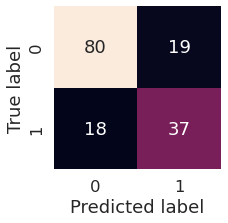

In [42]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

In [43]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [44]:
cv_acc=cross_val_score(rfc,x,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.7539343009931245

In [45]:
cv_precision=cross_val_score(rfc,x,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.6946618951224214

In [46]:
cv_recall=cross_val_score(rfc,x,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.45897973445143253

In [47]:
cv_f1=cross_val_score(rfc,x,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.6083912380886348

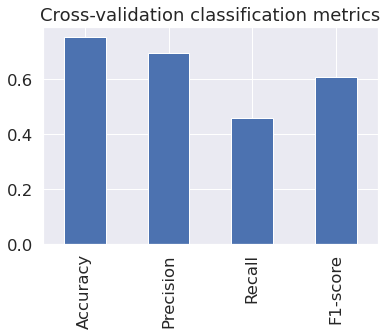

In [48]:
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,"Precision":cv_precision,
                         "Recall":cv_recall,"F1-score":cv_f1
                        },index=[0])
cv_metrics.T.plot.bar(title="Cross-validation classification metrics",legend=False);

In [51]:
# so we use RandomForest clasifer as it has bset accuracy 
import pickle
pickle.dump(rfc,open("Diabatice-prediction-model.pkl","wb"))